### Clustering PCA

In [1]:
import pandas as pd


CAMINHO = "../data/Customers_data_cleaning.csv"

df = pd.read_csv(CAMINHO)

df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,YearsSinceEnrolled,Age,AgeGroup,MntTotal,MntRegularProds,Children,HasChildren,AcceptedCmpTotal,HasAcceptedCmp,TotalNumPurchases
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,1,57,46-60,1617,1529,0,0,0,0,22
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,60,46-60,27,21,2,1,0,0,4
2,Graduation,Partner,71613.0,0,0,26,426,49,127,111,...,0,49,46-60,776,734,0,0,0,0,20
3,Graduation,Partner,26646.0,1,0,26,11,4,20,10,...,0,30,18-30,53,48,1,1,0,0,6
4,PhD,Partner,58293.0,1,0,94,173,43,118,46,...,0,33,31-45,422,407,1,1,0,0,14


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Marital_Status       2240 non-null   object 
 2   Income               2240 non-null   float64
 3   Kidhome              2240 non-null   int64  
 4   Teenhome             2240 non-null   int64  
 5   Recency              2240 non-null   int64  
 6   MntWines             2240 non-null   int64  
 7   MntFruits            2240 non-null   int64  
 8   MntMeatProducts      2240 non-null   int64  
 9   MntFishProducts      2240 non-null   int64  
 10  MntSweetProducts     2240 non-null   int64  
 11  MntGoldProds         2240 non-null   int64  
 12  NumDealsPurchases    2240 non-null   int64  
 13  NumWebPurchases      2240 non-null   int64  
 14  NumCatalogPurchases  2240 non-null   int64  
 15  NumStorePurchases    2240 non-null   i

In [3]:
# selecionando apenas colunas numéricas
numerical_features = df.select_dtypes(include="number").columns

len(numerical_features)

32

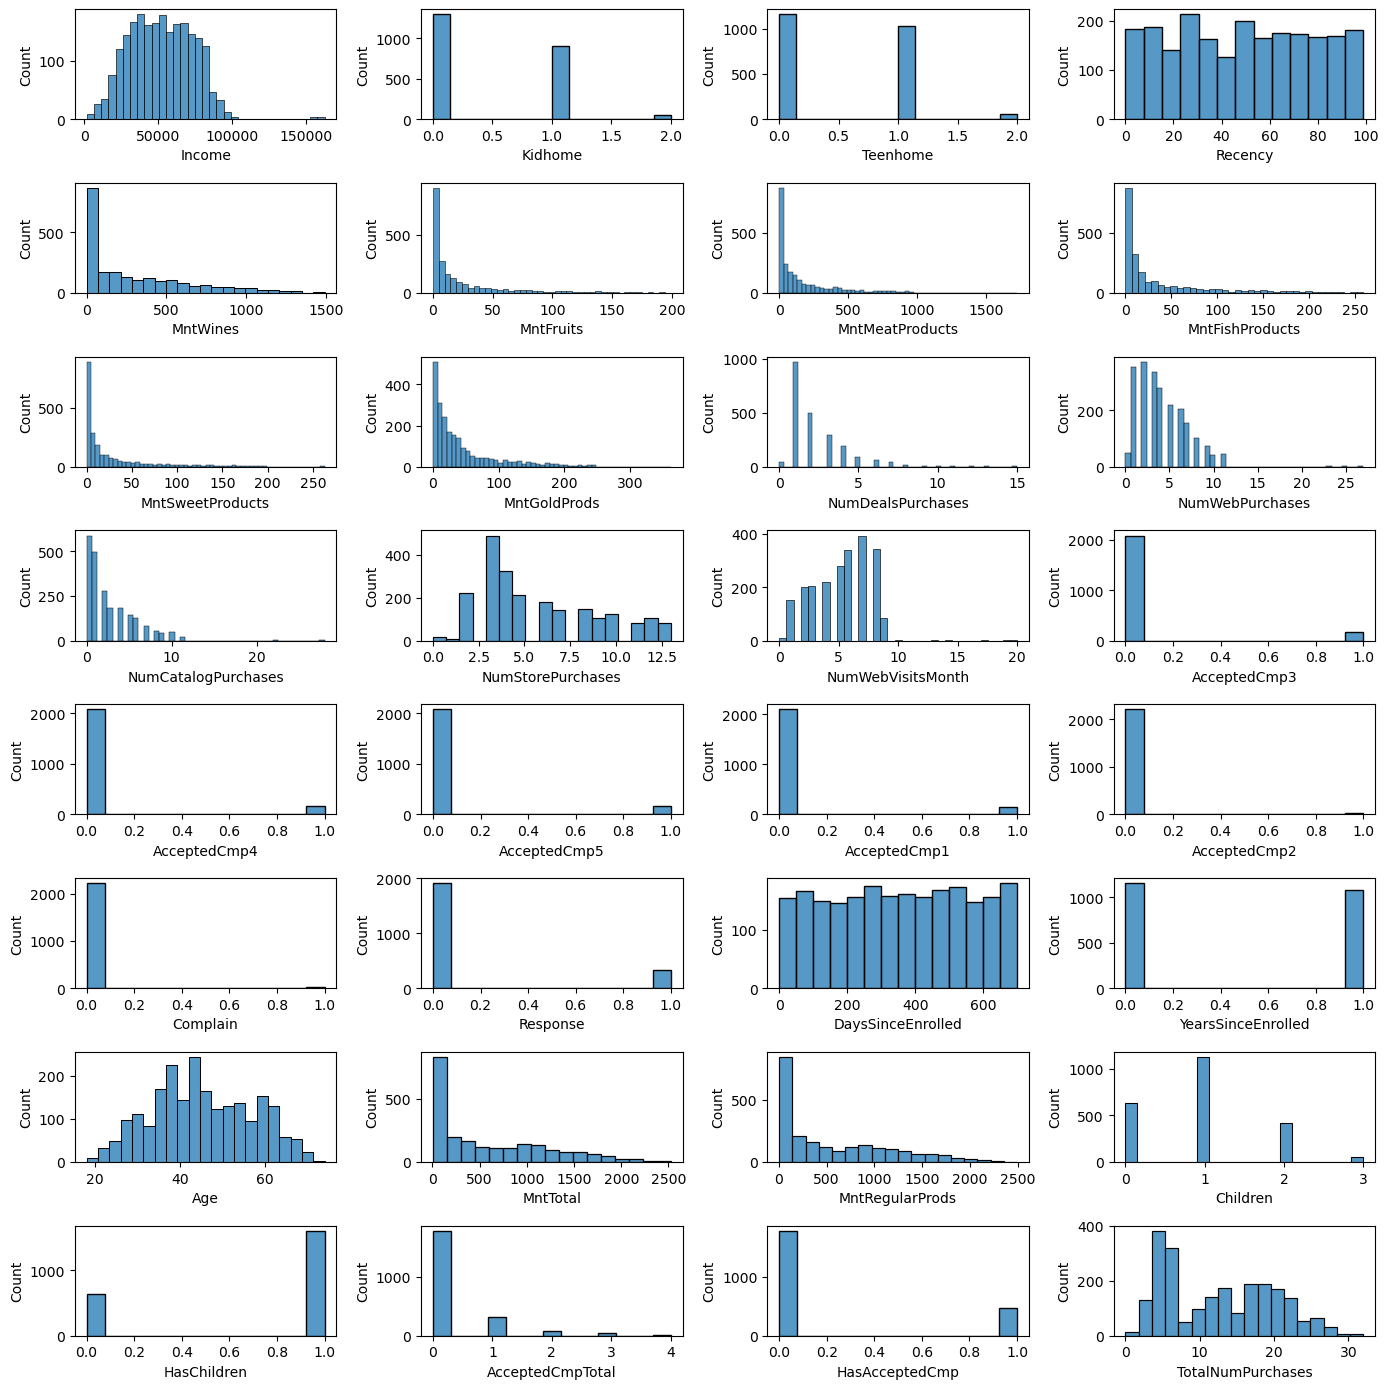

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axs = plt.subplots(8, 4, figsize=(14, 14), tight_layout=True)

for ax, feature in zip(axs.flatten(), numerical_features):
    sns.histplot(df, x=feature, ax=ax)

plt.show()

In [5]:
# colunas que passaram por one hot encoding

# vars categóricas (discretas)
onehot_cols = [
    "Education",
    "Marital_Status",
    "AgeGroup",
]

# vars de distribuicao semelhante à gaussiana
standard_cols = [
    "Income",
    "Age"
]

# vars de distribuicao semelhante à exponenciais
power_cols = df.columns[(df.columns.str.startswith("Mnt")) | (df.columns.str.startswith("Num"))].tolist()

# vars uniformes passarão pela normalização minmax
minmax_cols = [col for col in df.columns if col not in onehot_cols + standard_cols + power_cols]

### Encoding dos dados

In [6]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.compose import ColumnTransformer


preprocessing = ColumnTransformer(
    [
        ("onehot", OneHotEncoder(), onehot_cols),
        ("standar", StandardScaler(), standard_cols),
        ("power", PowerTransformer(), power_cols),
        ("minmax", MinMaxScaler(), minmax_cols)
    ]
)

preprocessing.fit_transform(df)

array([[0.     , 0.     , 1.     , ..., 0.     , 0.     , 0.6875 ],
       [0.     , 0.     , 1.     , ..., 0.     , 0.     , 0.125  ],
       [0.     , 0.     , 1.     , ..., 0.     , 0.     , 0.625  ],
       ...,
       [0.     , 0.     , 1.     , ..., 0.25   , 1.     , 0.5625 ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.65625],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.25   ]])

In [7]:
preprocessing.get_feature_names_out()

array(['onehot__Education_2n Cycle', 'onehot__Education_Basic',
       'onehot__Education_Graduation', 'onehot__Education_Master',
       'onehot__Education_PhD', 'onehot__Marital_Status_Partner',
       'onehot__Marital_Status_Single', 'onehot__AgeGroup_18-30',
       'onehot__AgeGroup_31-45', 'onehot__AgeGroup_46-60',
       'onehot__AgeGroup_61+', 'standar__Income', 'standar__Age',
       'power__MntWines', 'power__MntFruits', 'power__MntMeatProducts',
       'power__MntFishProducts', 'power__MntSweetProducts',
       'power__MntGoldProds', 'power__NumDealsPurchases',
       'power__NumWebPurchases', 'power__NumCatalogPurchases',
       'power__NumStorePurchases', 'power__NumWebVisitsMonth',
       'power__MntTotal', 'power__MntRegularProds', 'minmax__Kidhome',
       'minmax__Teenhome', 'minmax__Recency', 'minmax__AcceptedCmp3',
       'minmax__AcceptedCmp4', 'minmax__AcceptedCmp5',
       'minmax__AcceptedCmp1', 'minmax__AcceptedCmp2', 'minmax__Complain',
       'minmax__Response'

In [8]:
df_scaled = pd.DataFrame(
    preprocessing.fit_transform(df),
    columns = preprocessing.get_feature_names_out()
)

df_scaled.head()

,onehot__Education_2n Cycle,onehot__Education_Basic,onehot__Education_Graduation,onehot__Education_Master,onehot__Education_PhD,onehot__Marital_Status_Partner,onehot__Marital_Status_Single,onehot__AgeGroup_18-30,onehot__AgeGroup_31-45,onehot__AgeGroup_46-60,...,minmax__AcceptedCmp2,minmax__Complain,minmax__Response,minmax__DaysSinceEnrolled,minmax__YearsSinceEnrolled,minmax__Children,minmax__HasChildren,minmax__AcceptedCmpTotal,minmax__HasAcceptedCmp,minmax__TotalNumPurchases
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.948498,1.0,0.000000,0.0,0.0,0.0,0.6875
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.161660,0.0,0.666667,1.0,0.0,0.0,0.1250
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.446352,0.0,0.000000,0.0,0.0,0.0,0.6250
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.198856,0.0,0.333333,1.0,0.0,0.0,0.1875
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.230329,0.0,0.333333,1.0,0.0,0.0,0.4375


In [9]:
scaled_cols_not_onehot = df_scaled.columns[~df_scaled.columns.str.startswith("one")]

scaled_cols_not_onehot

Index(['standar__Income', 'standar__Age', 'power__MntWines',
       'power__MntFruits', 'power__MntMeatProducts', 'power__MntFishProducts',
       'power__MntSweetProducts', 'power__MntGoldProds',
       'power__NumDealsPurchases', 'power__NumWebPurchases',
       'power__NumCatalogPurchases', 'power__NumStorePurchases',
       'power__NumWebVisitsMonth', 'power__MntTotal', 'power__MntRegularProds',
       'minmax__Kidhome', 'minmax__Teenhome', 'minmax__Recency',
       'minmax__AcceptedCmp3', 'minmax__AcceptedCmp4', 'minmax__AcceptedCmp5',
       'minmax__AcceptedCmp1', 'minmax__AcceptedCmp2', 'minmax__Complain',
       'minmax__Response', 'minmax__DaysSinceEnrolled',
       'minmax__YearsSinceEnrolled', 'minmax__Children', 'minmax__HasChildren',
       'minmax__AcceptedCmpTotal', 'minmax__HasAcceptedCmp',
       'minmax__TotalNumPurchases'],
      dtype='object')

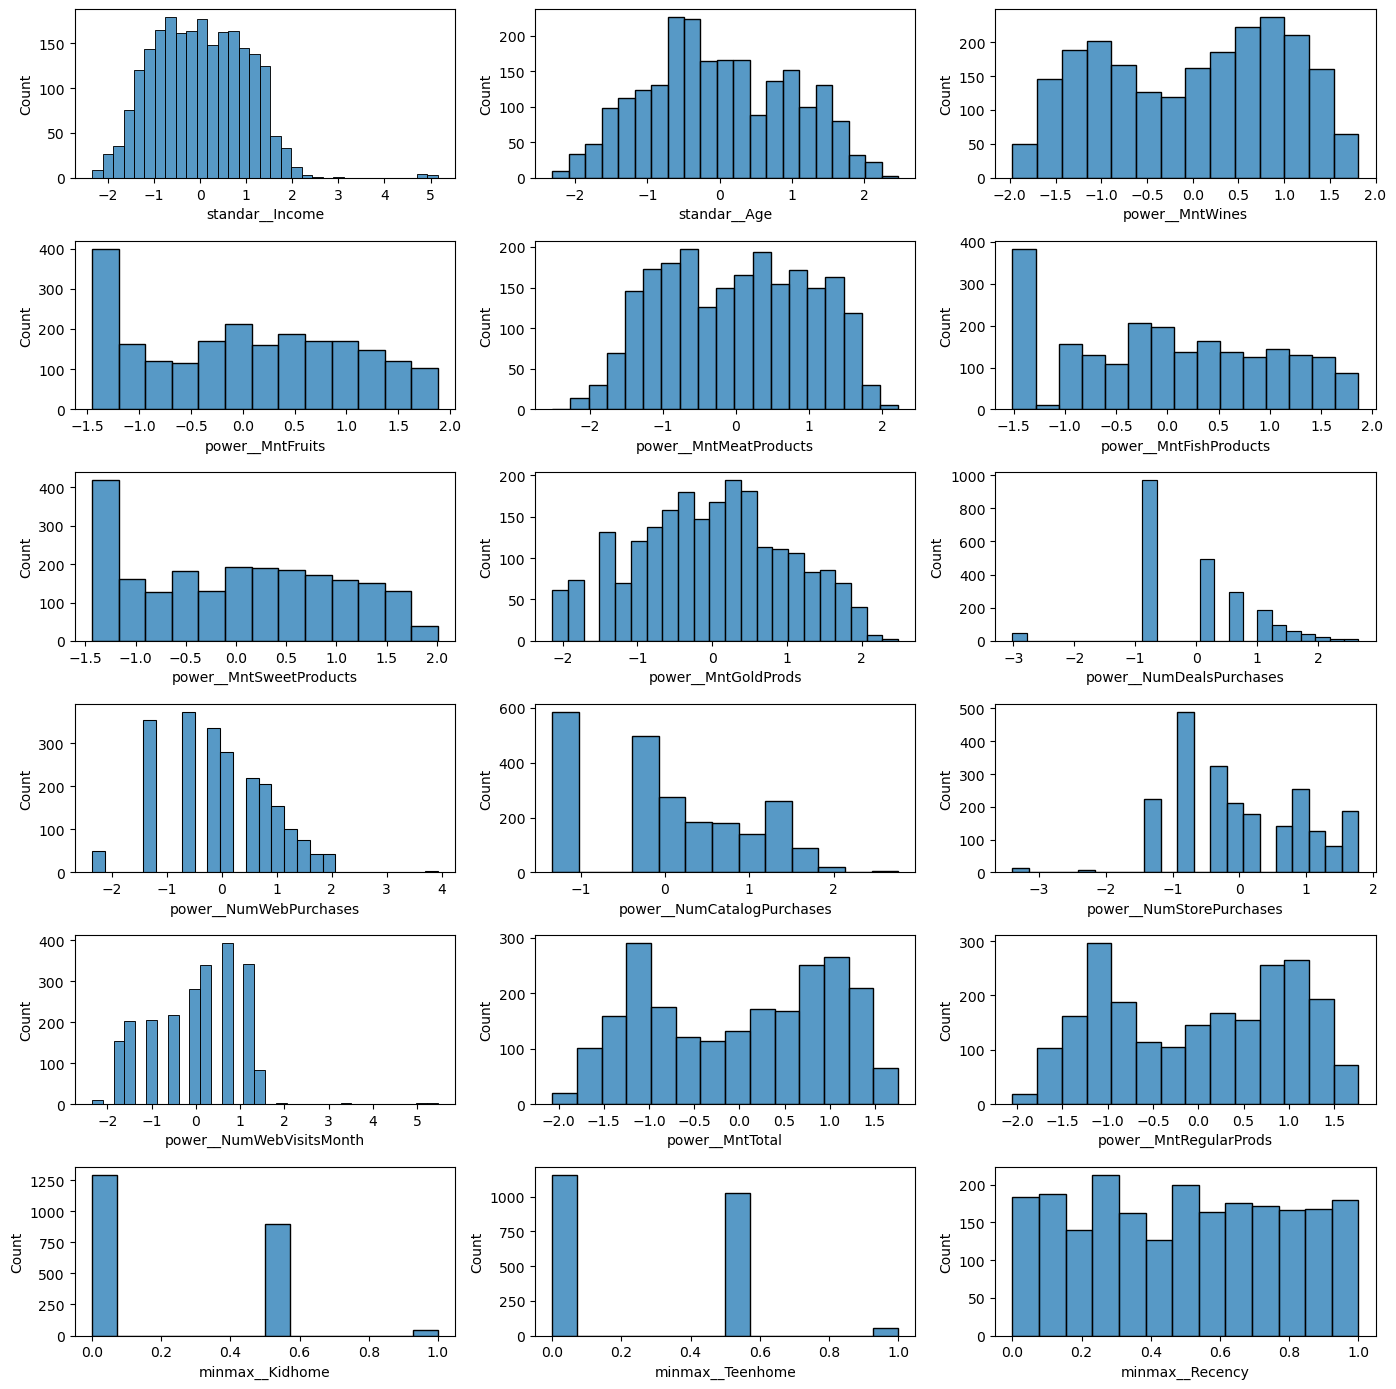

In [10]:
fig, axs = plt.subplots(6, 3, figsize=(14, 14), tight_layout=True)

for ax, feature in zip(axs.flatten(), scaled_cols_not_onehot):
    sns.histplot(df_scaled, x=feature, ax=ax)

plt.show()

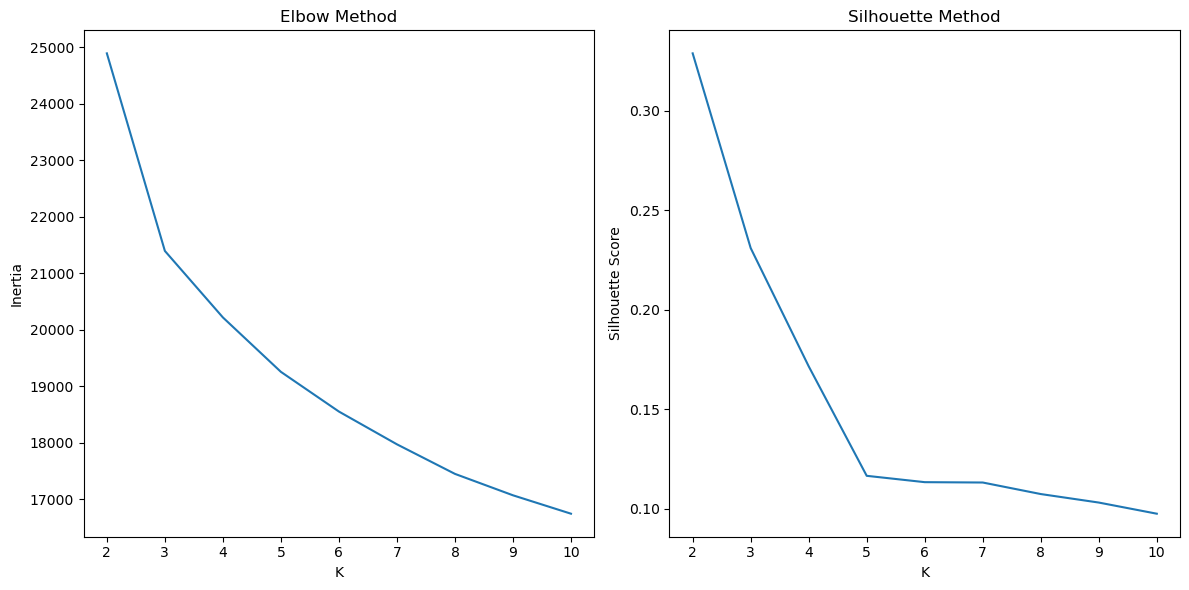

In [11]:
'''
3 clusters mantem o silhouette score alto e o elbow é bem percebido
'''
from auxiliary_functions import elbow_silhouette

elbow_silhouette(df_scaled)

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


RANDOM_STATE = 42

pipeline = Pipeline(
    [
        ("preprocessing", preprocessing),
        ("pca", PCA(n_components=2, random_state=RANDOM_STATE)),
        ("clustering", KMeans(n_clusters=3, random_state=RANDOM_STATE, n_init=10))
    ]
)

pipeline.fit(df)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('onehot', OneHotEncoder(),
                                                  ['Education',
                                                   'Marital_Status',
                                                   'AgeGroup']),
                                                 ('standar', StandardScaler(),
                                                  ['Income', 'Age']),
                                                 ('power', PowerTransformer(),
                                                  ['MntWines', 'MntFruits',
                                                   'MntMeatProducts',
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalo...
                                                  ['Kidhome', 'Teenhome',
                                                   'Recency', 'AcceptedCmp3',
                                                   'AcceptedCmp4',
                                                   'AcceptedCmp5',
                                                   'AcceptedCmp1',
                                                   'AcceptedCmp2', 'Complain',
                                                   'Response',
                                                   'DaysSinceEnrolled',
                                                   'YearsSinceEnrolled',
                                                   'Children', 'HasChildren',
                                                   'AcceptedCmpTotal',
                                                   'HasAcceptedCmp',
                                                   'TotalNumPurchases'])])),
                ('pca', PCA(n_components=2, random_state=42)),
                ('clustering',
                 KMeans(n_clusters=3, n_init=10, random_state=42))])

In [13]:
pipeline.get_feature_names_out()

array(['kmeans0', 'kmeans1', 'kmeans2'], dtype=object)

In [14]:
pipeline.named_steps

{'preprocessing': ColumnTransformer(transformers=[('onehot', OneHotEncoder(),
                                  ['Education', 'Marital_Status', 'AgeGroup']),
                                 ('standar', StandardScaler(),
                                  ['Income', 'Age']),
                                 ('power', PowerTransformer(),
                                  ['MntWines', 'MntFruits', 'MntMeatProducts',
                                   'MntFishProducts', 'MntSweetProducts',
                                   'MntGoldProds', 'NumDealsPurchases',
                                   'NumWebPurchases', 'NumCatalogPurchases',
                                   'NumStorePurchases', 'NumWebVisitsMonth',
                                   'MntTotal', 'MntRegularProds']),
                                 ('minmax', MinMaxScaler(),
                                  ['Kidhome', 'Teenhome', 'Recency',
                                   'AcceptedCmp3', 'AcceptedCmp4',
                   

In [15]:
pipeline["clustering"].labels_

array([0, 1, 0, ..., 0, 0, 2])

In [16]:
df_clustered = df.copy()

df_clustered["cluster"] = pipeline["clustering"].labels_

df_clustered

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Age,AgeGroup,MntTotal,MntRegularProds,Children,HasChildren,AcceptedCmpTotal,HasAcceptedCmp,TotalNumPurchases,cluster
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,57,46-60,1617,1529,0,0,0,0,22,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,60,46-60,27,21,2,1,0,0,4,1
2,Graduation,Partner,71613.0,0,0,26,426,49,127,111,...,49,46-60,776,734,0,0,0,0,20,0
3,Graduation,Partner,26646.0,1,0,26,11,4,20,10,...,30,18-30,53,48,1,1,0,0,6,1
4,PhD,Partner,58293.0,1,0,94,173,43,118,46,...,33,31-45,422,407,1,1,0,0,14,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Partner,61223.0,0,1,46,709,43,182,42,...,47,46-60,1341,1094,1,1,0,0,16,0
2236,PhD,Partner,64014.0,2,1,56,406,0,30,0,...,68,61+,444,436,3,1,1,1,15,2
2237,Graduation,Single,56981.0,0,0,91,908,48,217,32,...,33,31-45,1241,1217,0,0,1,1,18,0
2238,Master,Partner,69245.0,0,1,8,428,30,214,80,...,58,46-60,843,782,1,1,0,0,21,0


In [17]:
df_clustered.cluster.value_counts().sort_index()

cluster
0    690
1    895
2    655
Name: count, dtype: int64

### Analisando os clusters formados

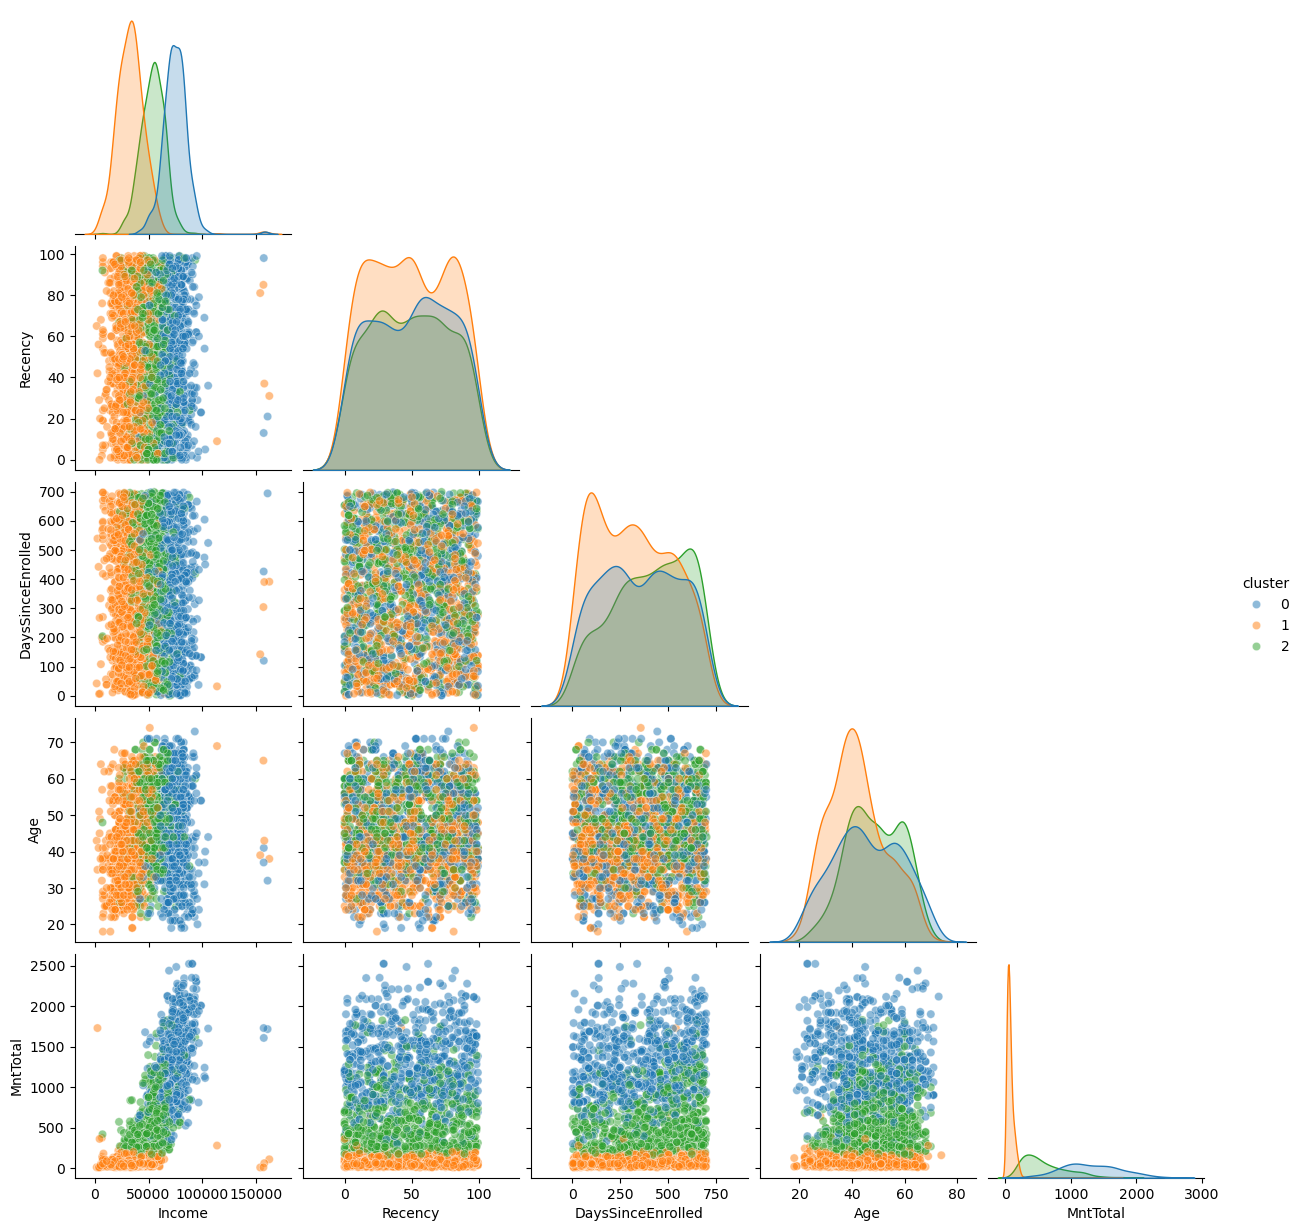

In [18]:
from auxiliary_functions import pairplot


analysis = [
    "Income",
    "Recency",
    "DaysSinceEnrolled",
    "Age",
    "MntTotal",
]

pairplot(df_clustered, analysis, "cluster");

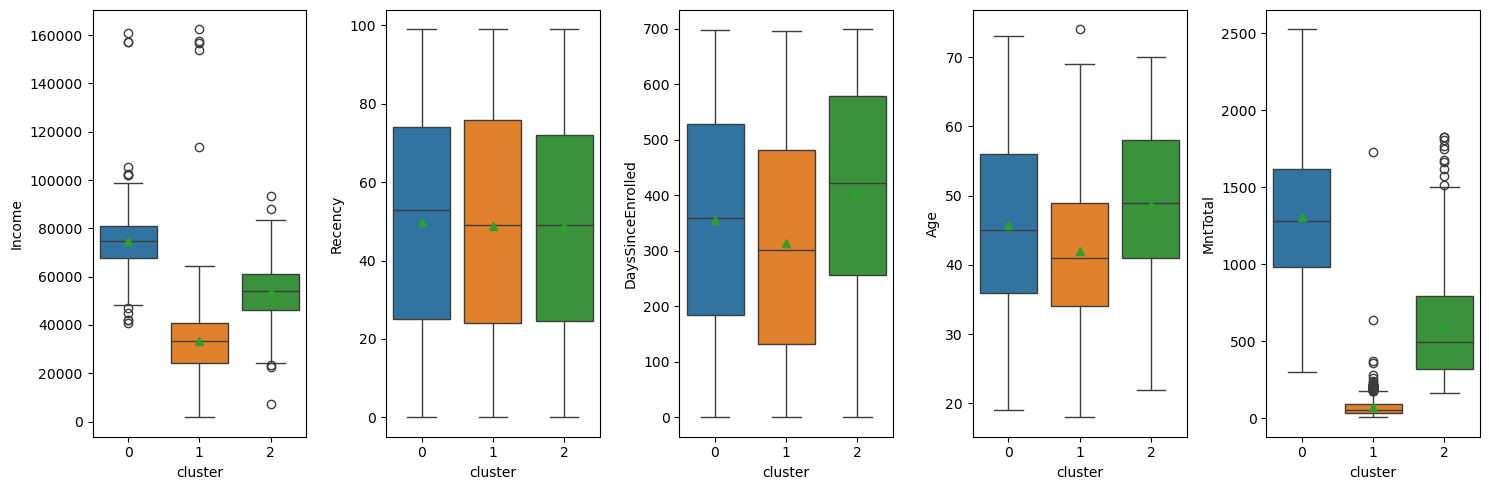

In [19]:
fig, axs = plt.subplots(1, 5, figsize=(15, 5), tight_layout=True)

for ax, col in zip(axs, analysis):
    sns.boxplot(df_clustered, x="cluster", y=col, ax=ax, palette="tab10", showmeans=True)

plt.show()

In [20]:
colunas = [
    "HasChildren", "Marital_Status", "Education", "HasAcceptedCmp", "Response", "YearsSinceEnrolled", 
]

cluster_dif_cols = [
    "MntTotal", "Income"
]

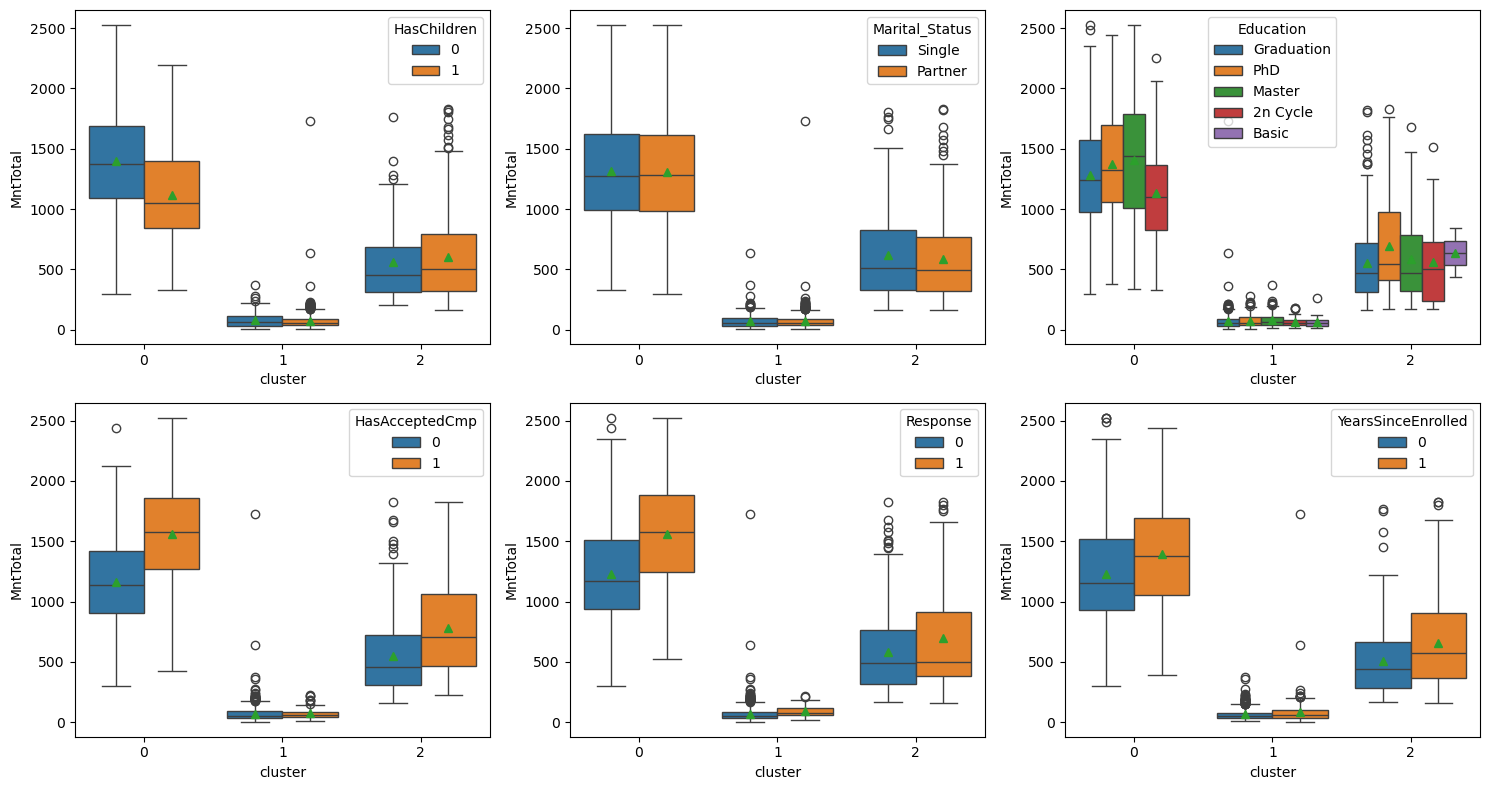

In [21]:
'''
Presença de bastante outliers pode indicar uma base com poucos dados
'''

fig, axs = plt.subplots(2, 3, figsize=(15, 8), tight_layout=True)

for ax, col in zip(axs.flatten(), colunas):
    sns.boxplot(df_clustered, x="cluster", y=cluster_dif_cols[0], ax=ax, palette="tab10", showmeans=True, hue=col)

plt.show()

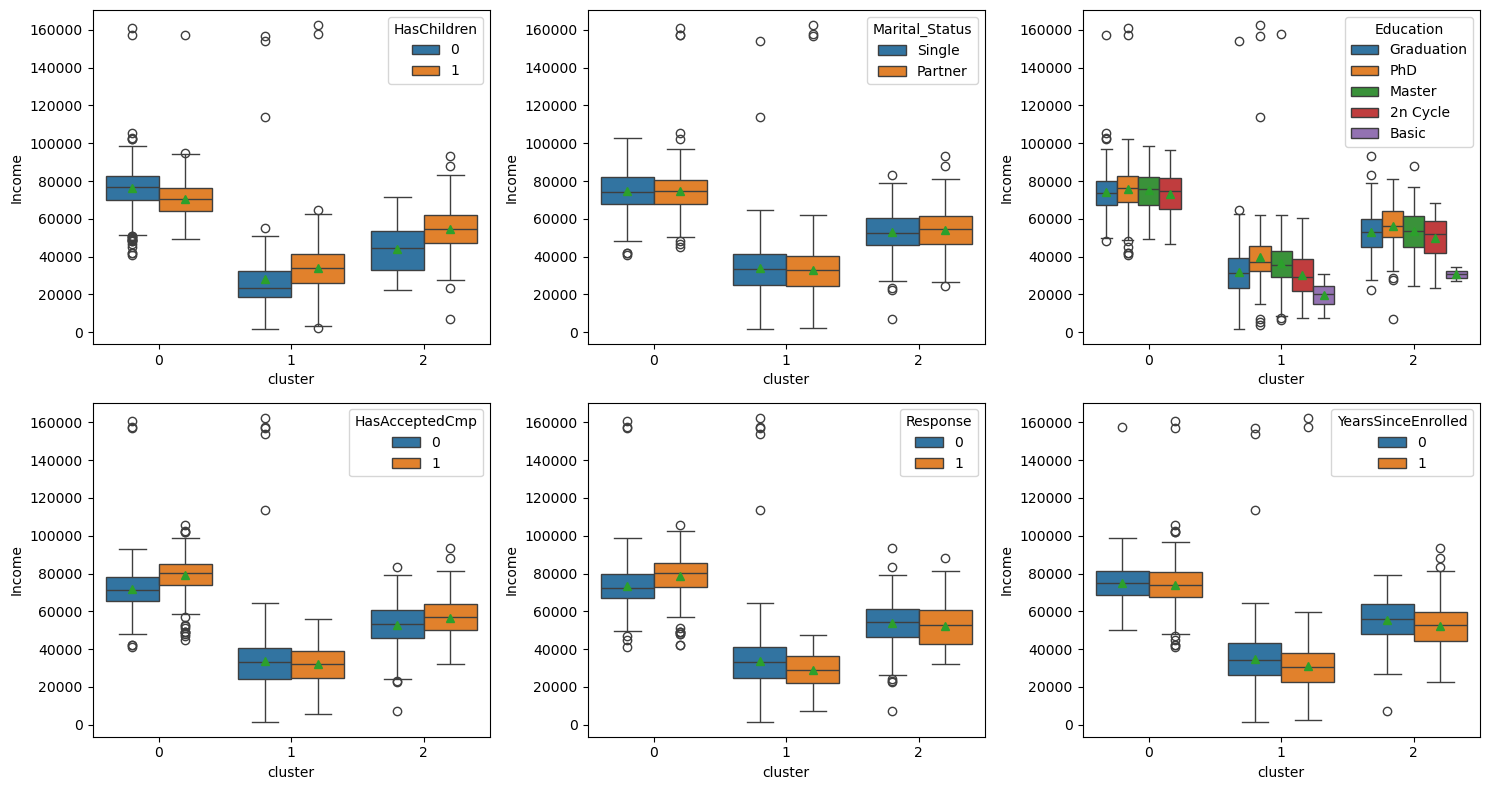

In [22]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8), tight_layout=True)

for ax, col in zip(axs.flatten(), colunas):
    sns.boxplot(df_clustered, x="cluster", y=cluster_dif_cols[1], ax=ax, palette="tab10", showmeans=True, hue=col)

plt.show()

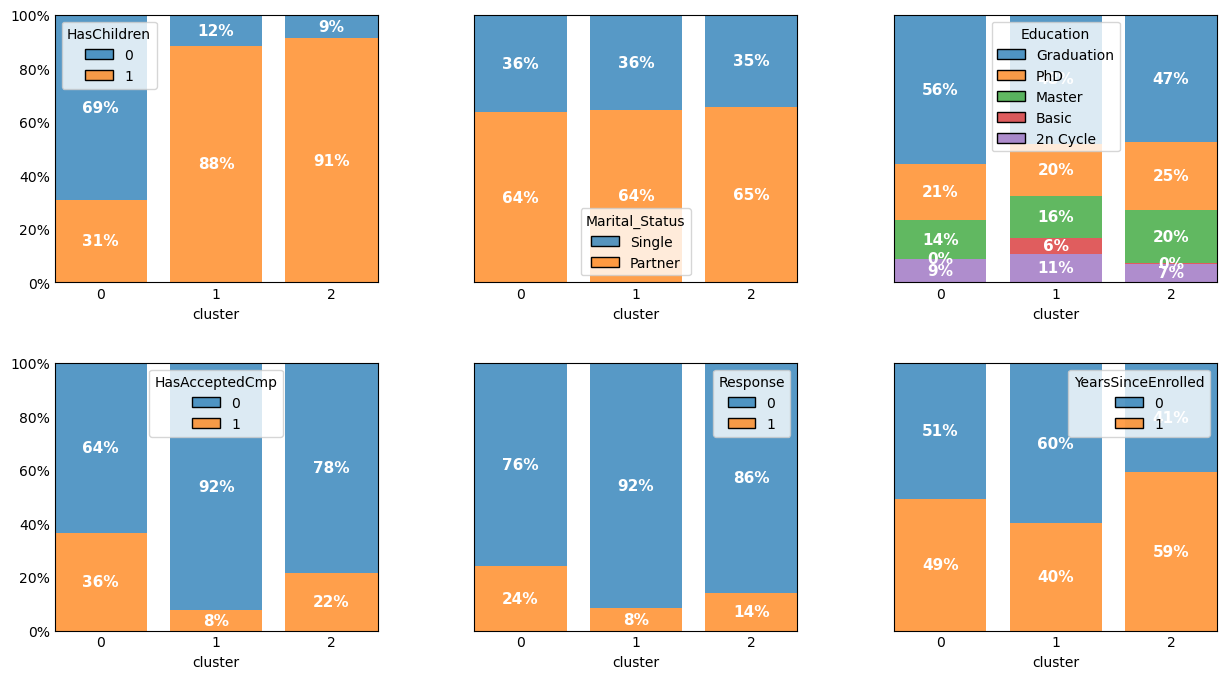

In [23]:
from auxiliary_functions import cluster_percent

cluster_percent(df_clustered, colunas)

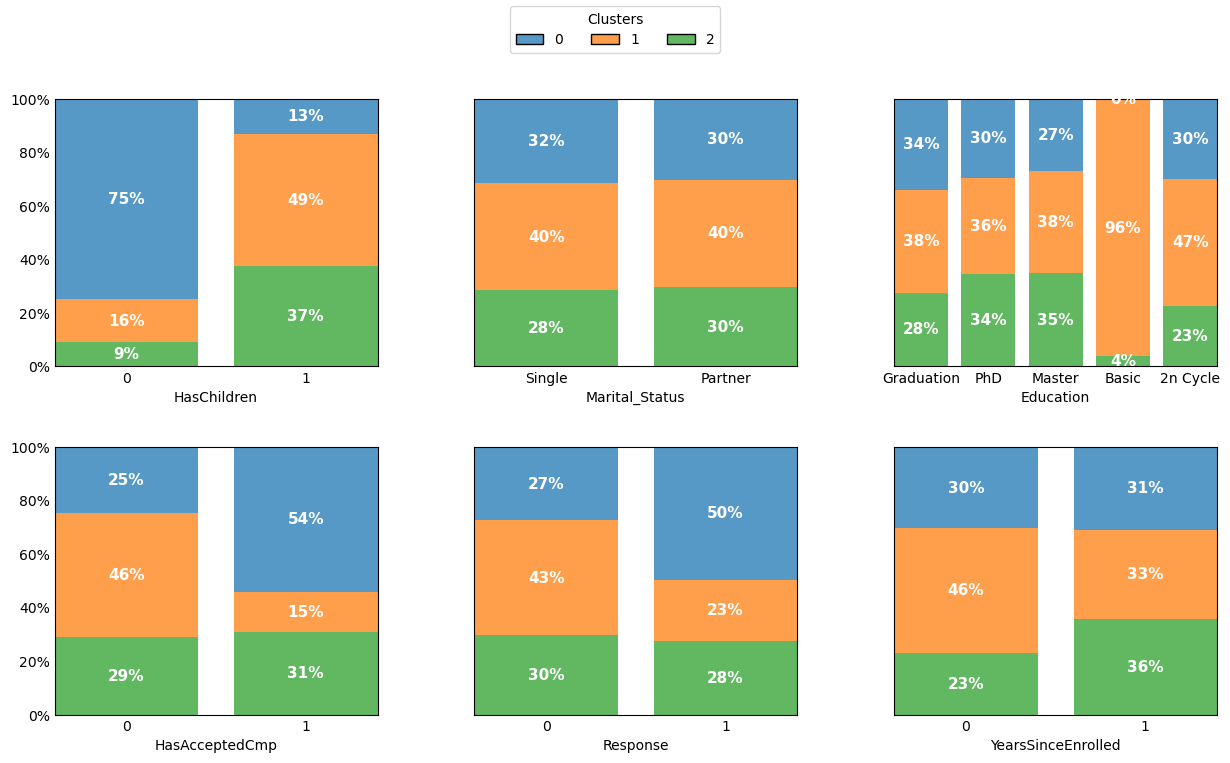

In [24]:
from auxiliary_functions import column_percent

column_percent(df_clustered, colunas)

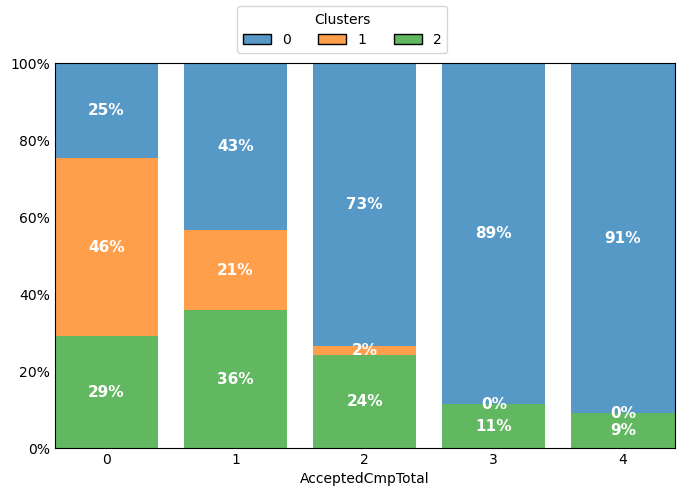

In [25]:
# visualizar colunas individualmente

column_percent(df_clustered, ["AcceptedCmpTotal"], rows_cols=(1,1), figsize=(8, 5))

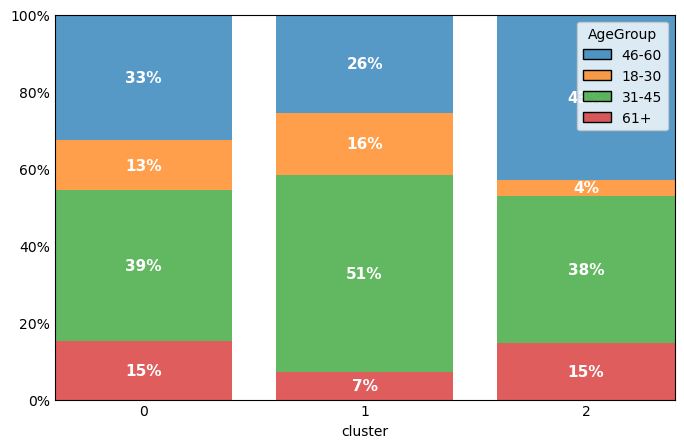

In [26]:
cluster_percent(df_clustered, ["AgeGroup"], rows_cols=(1,1), figsize=(8, 5))

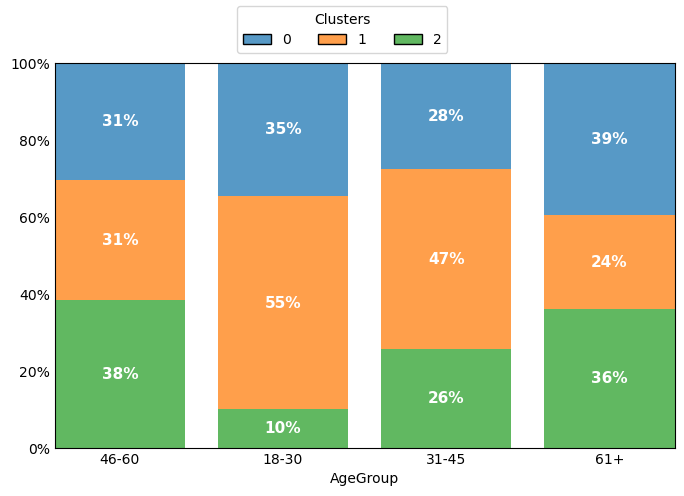

In [27]:
column_percent(df_clustered, ["AgeGroup"], rows_cols=(1,1), figsize=(8, 5))

### Análise por cluster

In [28]:
'''
Cluster 0:
    - Renda baixa
    - Gasto baixo
    - Provavelmente tem filhos
    - Baixa propensão a aceitar campanhas
    - Único cluster com percentagem significativa de pessoas com escolaridade básica
    - Pessoas mais jovens
    
Cluster 1:
    - Renda intermediária
    - Gasto intermediário
    - Provavelmente tem filhos
    - Podem aceitar campanhas
    - Pessoas com idade mais elevada

Cluster 2:
    - Renda alta
    - Gasto alto
    - Muito provavelmente não tem filhos
    - Mais propenso a aceitar campanhas
    - Cluster sem pessoas com escolaridade básica
    - Sem perfil de idade que se destaque
'''

'\nCluster 0:\n    - Renda baixa\n    - Gasto baixo\n    - Provavelmente tem filhos\n    - Baixa propensão a aceitar campanhas\n    - Único cluster com percentagem significativa de pessoas com escolaridade básica\n    - Pessoas mais jovens\n    \nCluster 1:\n    - Renda intermediária\n    - Gasto intermediário\n    - Provavelmente tem filhos\n    - Podem aceitar campanhas\n    - Pessoas com idade mais elevada\n\nCluster 2:\n    - Renda alta\n    - Gasto alto\n    - Muito provavelmente não tem filhos\n    - Mais propenso a aceitar campanhas\n    - Cluster sem pessoas com escolaridade básica\n    - Sem perfil de idade que se destaque\n'

In [30]:
'''
PCA aparentemente não gerou tanta perda de informações
'''

'\nPCA aparentemente não gerou tanta perda de informações\n'

In [35]:
pipeline[:-1].get_feature_names_out()

array(['pca0', 'pca1'], dtype=object)

In [38]:
df_pca = pd.DataFrame(
    pipeline[:-1].fit_transform(df),
    columns = pipeline[:-1].get_feature_names_out()
)

df_pca

,pca0,pca1
0,-3.834974,-1.150008
1,3.540693,0.287408
2,-2.821713,0.519466
3,3.012657,0.666873
4,-1.126812,-0.426060
...,...,...
2235,-3.136524,-0.819042
2236,0.623857,-3.192303
2237,-2.371954,0.882346
2238,-3.089196,-0.295722


In [42]:
centroids = pipeline["clustering"].cluster_centers_

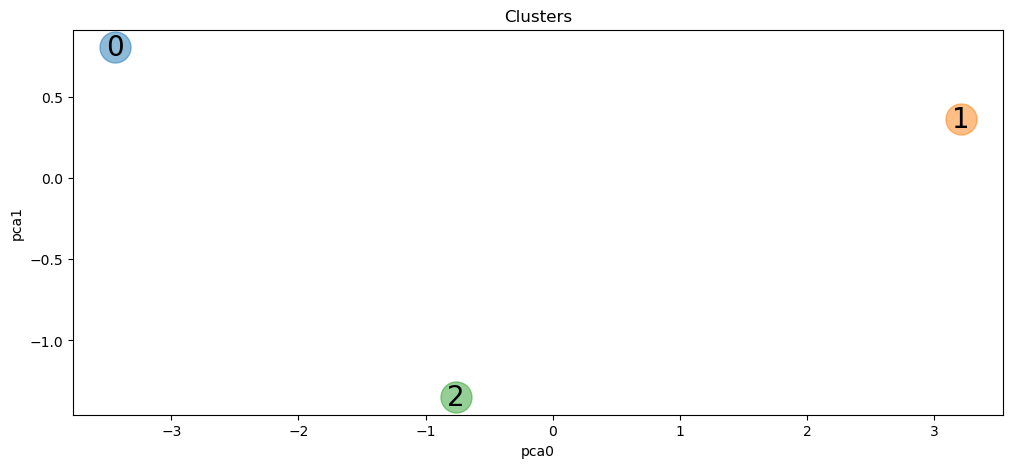

In [43]:
from auxiliary_functions import show_clusters_2D


show_clusters_2D(df_pca, df_pca.columns, 3, centroids)

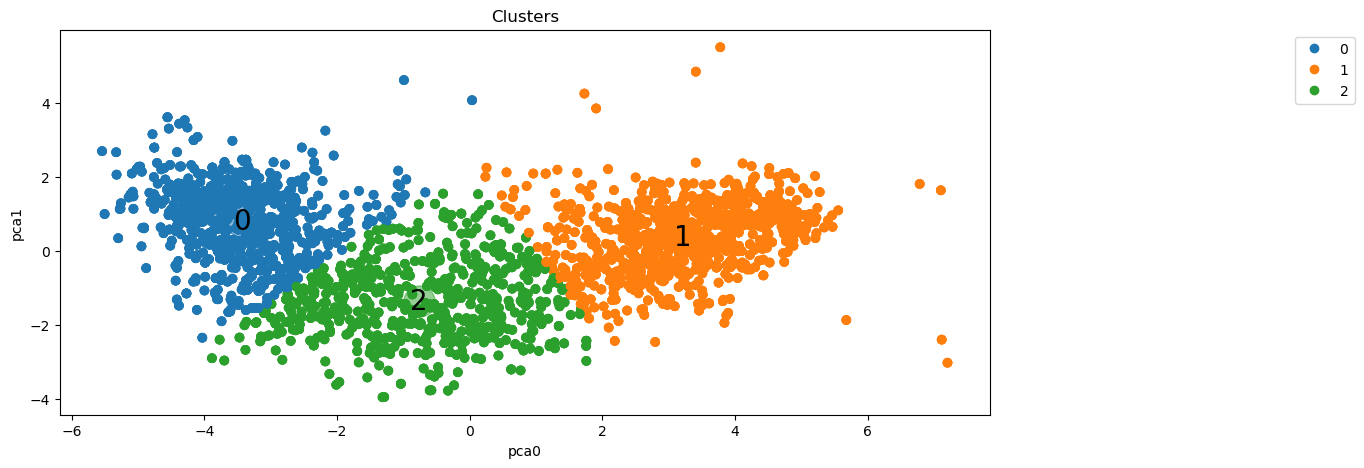

In [45]:
show_clusters_2D(df_pca, df_pca.columns, 3, centroids, mostrar_pontos=True, coluna_clusters=df_clustered.cluster)

In [48]:
df_clustered.to_csv("../data/Customers_clustered.csv", index=False)